In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Collection

In [2]:
plastic = pd.read_csv("C:/Users/manth/Assignment/Forecasting/PlasticSales.csv")
plastic.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


## Exploratory Data Analysis (EDA)

In [3]:
plastic.isnull().sum()

Month    0
Sales    0
dtype: int64

In [4]:
plastic.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,60.0,1162.366667,266.431469,697.0,947.75,1148.0,1362.5,1637.0


In [5]:
plastic['Month'] = pd.to_datetime(plastic['Month'])
plastic['Months'] = plastic['Month'].dt.strftime('%b')
plastic.tail()

,Month,Sales,Months
55,2053-08-01,1608,Aug
56,2053-09-01,1528,Sep
57,2053-10-01,1420,Oct
58,2053-11-01,1119,Nov
59,2053-12-01,1013,Dec


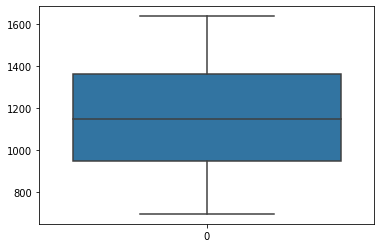

In [6]:
import seaborn as sns
sns.boxplot(data=plastic['Sales'])

In [7]:
month_dummies = pd.DataFrame(pd.get_dummies(plastic['Months']))
plastic1 = pd.concat([plastic,month_dummies],axis = 1)
plastic1.head()

,Month,Sales,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2049-01-01,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,2049-02-01,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,2049-03-01,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,2049-04-01,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,2049-05-01,1030,May,0,0,0,0,0,0,0,0,1,0,0,0


In [8]:
plastic1["t"] = np.arange(1,61)   #time index
plastic1["t_squared"] = plastic1["t"]*plastic1["t"] # for ploynomial/quadratic trend
plastic1["log_Sales"] = np.log(plastic1["Sales"]) # For multiplicative seasonality
plastic1.head()

,Month,Sales,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Sales
0,2049-01-01,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,6.609349
1,2049-02-01,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,6.546785
2,2049-03-01,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,6.654153
3,2049-04-01,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,6.800170
4,2049-05-01,1030,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,6.937314


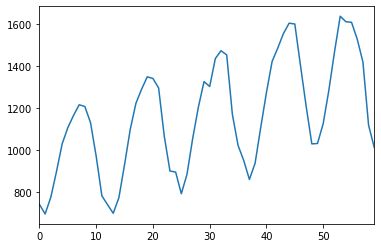

In [9]:
plastic1.Sales.plot()
plt.show()

In [10]:
Train = plastic1.head(48)
Test = plastic1.tail(12)

In [11]:
# L I N E A R 

import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  260.9378142511123


In [12]:
# Exponential 

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  268.6938385002598


In [13]:
# Quadratic

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  297.40670972718397


In [14]:
# Additive seasonality

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  235.60267356646526


In [15]:
# Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 218.19387584889216


In [16]:
# Multiplicative Seasonality 

Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 239.65432143121078


In [17]:
# Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 160.68332947193488


In [18]:
# Testing 

data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,260.937814
1,rmse_Exp,268.693839
2,rmse_Quad,297.406710
3,rmse_add_sea,235.602674
4,rmse_add_sea_quad,218.193876
5,rmse_Mult_sea,239.654321
6,rmse_Mult_add_sea,160.683329


In [19]:
data = [['Jan-54', 'Jan'], ['Feb-54', 'Feb'], ['Mar-54', 'Mar'],['Apr-54', 'Apr'],['May-54', 'May'],['June-54', 'Jun'],
        ['Jul-54','Jul'],['Aug-54', 'Aug'],['Sep-54', 'Sep'],['Oct-54', 'Oct'],['Nov-54', 'Nov'],['Dec-54', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,Jan-54,Jan
1,Feb-54,Feb
2,Mar-54,Mar
3,Apr-54,Apr
4,May-54,May
5,June-54,Jun
6,Jul-54,Jul
7,Aug-54,Aug
8,Sep-54,Sep
9,Oct-54,Oct


In [20]:
# Create dummies and T and T-Squared columns

dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,13)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

      Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  \
0  Jan-54    Jan    0    0    0    0    1    0    0    0    0    0    0    0   
1  Feb-54    Feb    0    0    0    1    0    0    0    0    0    0    0    0   
2  Mar-54    Mar    0    0    0    0    0    0    0    1    0    0    0    0   
3  Apr-54    Apr    1    0    0    0    0    0    0    0    0    0    0    0   
4  May-54    May    0    0    0    0    0    0    0    0    1    0    0    0   

   t  t_squared  
0  1          1  
1  2          4  
2  3          9  
3  4         16  
4  5         25  


## Forecasting using the best model

In [21]:
# Forecasting using Multiplicative Additive Seasonality Model

model_full = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = plastic1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Sales'] = np.exp(forecast1['Forecasted_log'])

## Prediction for next 12 months

In [22]:
# Final Prediction for next 12 months

Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Sales']] 
Final_predict

,Date,Forecasted_Sales
0,Jan-54,735.511604
1,Feb-54,687.285730
2,Mar-54,758.119020
3,Apr-54,890.914100
4,May-54,1026.009386
5,June-54,1132.643225
6,Jul-54,1158.977050
7,Aug-54,1213.118530
8,Sep-54,1211.393367
9,Oct-54,1166.348313
